<a href="https://colab.research.google.com/github/andreslozada04/Repositorio-Andres/blob/main/Activity9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 7: visualización de datos multivariantes (multivariate data visualization)

In [5]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/antropometria-dataset.csv'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model

In [7]:
df = pd.read_csv(path)
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [8]:
df.isnull().any()

,0
folio,False
intp,False
entidad,False
desc_ent,False
sexo,False
edad,False
meses,False
peso,False
ropa,False
talla,False


In [9]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [17]:
model = sm.OLS.from_formula('peso ~ cintura', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:39:43   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
results.params


,0
Intercept,-8.313656
cintura,0.831568


In [20]:
results.rsquared

0.626752266114085

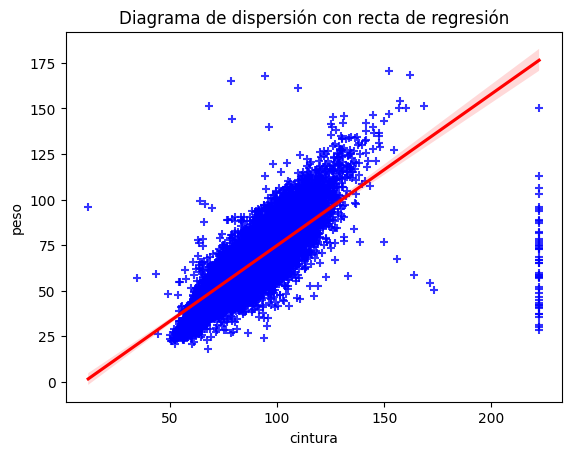

In [24]:
sns.regplot(x='cintura',
            y='peso',
            data=df,
            color='blue',
            marker='+',
           line_kws={'color':'red'})

plt.xlabel('cintura')
plt.ylabel('peso')
plt.title('Diagrama de dispersión con recta de regresión')
plt.show()


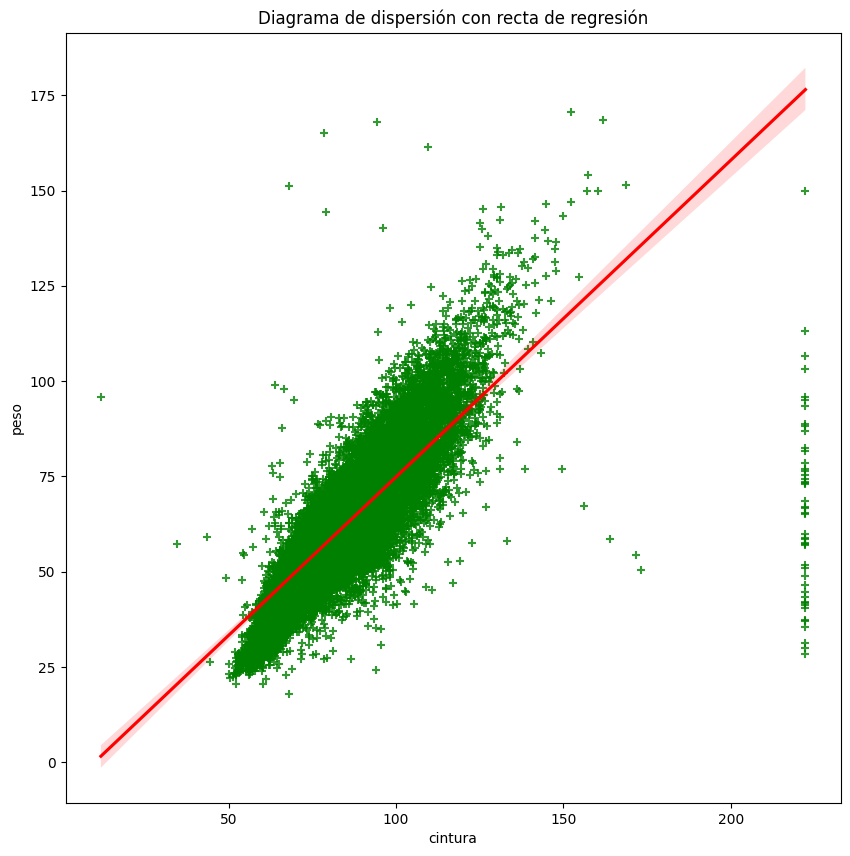

In [28]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x = 'cintura',
            y = 'peso',
            data = df,
            color = 'green',
            marker = '+',
            line_kws={'color':'red'})

plt.xlabel('cintura')
plt.ylabel('peso')
plt.title('Diagrama de dispersión con recta de regresión')
plt.show()

In [29]:
residuals = results.resid
residuals

,0
0,-0.062068
1,-9.256672
2,6.899685
3,-8.679342
4,12.296515
...,...
18635,6.777867
18636,-7.979387
18637,-4.268694
18638,-15.751528


In [34]:
hombres = df[df['sexo'] == 1]
mujeres = df[df['sexo'] == 2]

model_hombres = sm.OLS.from_formula('peso ~ cintura', data=hombres)
results_hombres = model_hombres.fit()
summary_hombres = results_hombres.summary()

print("Hombres:\n", summary_hombres)


Hombres:
                             OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 2.022e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:56:09   Log-Likelihood:                -30486.
No. Observations:                8154   AIC:                         6.098e+04
Df Residuals:                    8152   BIC:                         6.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.5015      0.599    -27.55

In [35]:
model_mujeres = sm.OLS.from_formula('peso ~ cintura', data = mujeres)
results_mujeres = model_mujeres.fit()
summary_mujeres = results_mujeres.summary()

print("Mujeres:\n", summary_mujeres)

Mujeres:
                             OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:56:12   Log-Likelihood:                -37386.
No. Observations:                9878   AIC:                         7.478e+04
Df Residuals:                    9876   BIC:                         7.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1852      0.562     -3.88

In [45]:
model = sm.OLS.from_formula('cadera ~ peso', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cadera   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 2.748e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:18:56   Log-Likelihood:                -65165.
No. Observations:               18032   AIC:                         1.303e+05
Df Residuals:                   18030   BIC:                         1.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4600      0.252    228.032      0.000      56.966      57.954
peso           0.6227      0.004    165.771      0.000       0.615       0.630
==============================================================================
Omnibus:                    22321.754   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6875856.023
Skew:                           6.463   Prob(JB):                         0.00
Kurtosis:                      97.786   Cond. No.                         253.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df['sistol'].corr(df['diastol'])

0.663960860811931

In [39]:
model = sm.OLS.from_formula('diastol ~ sistol', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:14:35   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model = sm.OLS.from_formula('cadera ~ peso', data=df)
results = model.fit()
fitted_values = results.fittedvalues

In [51]:
median_fitted = np.median(fitted_values)
print(f'La mediana de los valores ajustados es: {median_fitted}')

La mediana de los valores ajustados es: 97.18551705265607


In [54]:
model = sm.OLS.from_formula('diastol ~ sistol', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:25:07   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df['peso'].corr(df['cadera'])

0.7770606658014013

In [55]:
model = sm.OLS.from_formula('diastol ~ sistol + edad + peso + cintura', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:26:48   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model = sm.OLS.from_formula('diastol ~ sistol + edad + peso + cintura', data=df)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:28:01   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model = sm.OLS.from_formula('diastol ~ sistol', data=df)
results = model.fit()
residuals = results.resid

In [58]:
median_residuals = np.median(residuals)
print(f'La mediana de los residuos es: {median_residuals}')

La mediana de los residuos es: 0.002305549055435563
